In [1]:
import G_utils.p_matrix as p_matrix
from G_utils.spectral_clustering import spec_clustering 
from itertools import combinations,permutations
from  scipy.stats import lognorm
from numpy.random import default_rng
from multiprocessing import Pool


import matplotlib.pyplot as plt
import GERDA_light as gl
import numpy as np
import pandas as pd
import joblib as jb
import logging as log
import time
import copy 
logger = log.getLogger()
logger.setLevel(log.INFO)

from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)
#plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')
colors = plt.cm.twilight(np.linspace(0, 1, 21))  

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### createing a GERDA light world

In [2]:
w_cluster = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=True,
           k_I=0.2,
           only_P1=True,
           cluster_kwargs={'use_suggested_k':True},
           )
w = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=False,
           )

INFO:root:max_t 168
INFO:root:certainty 0.999
INFO:root:number of agents: 1060
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:P is a singular matrix, removing rows and columns with only zeros
INFO:root:124 agents have no certain contact in this time frame
INFO:root:use suggested k:157 instead of 250
INFO:root:eigenvalues done
INFO:root:kmeans_done
INFO:root:create contact list


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


INFO:root:contact list is done
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 54
INFO:root:inner cluster interactions 231
INFO:root:inner cluster interactions 252
INFO:root:inner cluster interactions 301
INFO:root:inner cluster interactions 379
INFO:root:inner cluster interactions 372
INFO:root:inner cluster interactions 301
INFO:root:inner cluster interactions 313
INFO:root:inner cluster interactions 327
INFO:root:inner cluster interactions 267
INFO:root:inner cluster interactions 202
INFO:root:inner cluster interactions 163
INFO:root:inner cluster interactions 77
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 27
INFO:root:inner cluster interactions 2

In [99]:
w_cluster.contacts[2] 

[(43, 17, 1.0),
 (91, 184, 0.3333333333333333),
 (91, 0, 0.3333333333333333),
 (91, 6, 0.3333333333333333),
 (184, 0, 0.3333333333333333),
 (184, 6, 0.3333333333333333),
 (0, 6, 0.3333333333333333),
 (3, 0, 1.0),
 (96, 194, 0.3333333333333333),
 (96, 49, 0.3333333333333333),
 (96, 153, 0.3333333333333333),
 (194, 49, 0.3333333333333333),
 (194, 153, 0.3333333333333333),
 (49, 153, 0.3333333333333333),
 (17, 48, 1.0),
 (133, 63, 0.5),
 (133, 6, 0.5),
 (63, 6, 0.5),
 (17, 70, 1.0),
 (95, 15, 0.3333333333333333),
 (95, 6, 0.3333333333333333),
 (95, 19, 0.3333333333333333),
 (15, 6, 0.3333333333333333),
 (15, 19, 0.3333333333333333),
 (6, 19, 0.3333333333333333),
 (0, 271, 0.5),
 (271, 0, 0.5),
 (6, 15, 0.3333333333333333),
 (6, 0, 0.3333333333333333),
 (6, 17, 0.3333333333333333),
 (15, 0, 0.3333333333333333),
 (15, 17, 0.3333333333333333),
 (0, 17, 0.3333333333333333),
 (28, 48, 0.5),
 (28, 6, 0.5),
 (48, 6, 0.5),
 (24, 6, 1.0),
 (137, 97, 1.0),
 (6, 0, 1.0),
 (48, 116, 1.0),
 (259, 109,

In [98]:
agent_contacts = model_cluster.world.agent_contacts

cluster_contact = {}
for t, c in agent_contacts.items():
    #print( t, c )
    

    print([(x,y,p) for x,y,p in c ] )
    break
model.world.contacts[0]

[(1, 2, 1.0), (3, 4, 0.3333333333333333), (3, 5, 0.3333333333333333), (3, 6, 0.3333333333333333), (4, 5, 0.3333333333333333), (4, 6, 0.3333333333333333), (5, 6, 0.3333333333333333), (7, 8, 1.0), (10, 11, 0.3333333333333333), (10, 12, 0.3333333333333333), (10, 13, 0.3333333333333333), (11, 12, 0.3333333333333333), (11, 13, 0.3333333333333333), (12, 13, 0.3333333333333333), (15, 16, 1.0), (17, 18, 0.5), (17, 19, 0.5), (18, 19, 0.5), (22, 23, 1.0), (24, 25, 0.3333333333333333), (24, 26, 0.3333333333333333), (24, 27, 0.3333333333333333), (25, 26, 0.3333333333333333), (25, 27, 0.3333333333333333), (26, 27, 0.3333333333333333), (28, 29, 0.5), (28, 30, 0.5), (29, 30, 0.5), (32, 33, 0.3333333333333333), (32, 34, 0.3333333333333333), (32, 35, 0.3333333333333333), (33, 34, 0.3333333333333333), (33, 35, 0.3333333333333333), (34, 35, 0.3333333333333333), (37, 38, 0.5), (37, 39, 0.5), (38, 39, 0.5), (41, 42, 1.0), (44, 45, 1.0), (46, 47, 1.0), (49, 50, 1.0), (52, 53, 0.2), (52, 54, 0.2), (52, 55, 0

[(1, 2, (1.0, 0.0, 0.0)),
 (3, 4, (0.3333333333333333, 0.0, 0.0)),
 (3, 5, (0.3333333333333333, 0.0, 0.0)),
 (3, 6, (0.3333333333333333, 0.0, 0.0)),
 (4, 5, (0.3333333333333333, 0.0, 0.0)),
 (4, 6, (0.3333333333333333, 0.0, 0.0)),
 (5, 6, (0.3333333333333333, 0.0, 0.0)),
 (7, 8, (1.0, 0.0, 0.0)),
 (10, 11, (0.3333333333333333, 0.0, 0.0)),
 (10, 12, (0.3333333333333333, 0.0, 0.0)),
 (10, 13, (0.3333333333333333, 0.0, 0.0)),
 (11, 12, (0.3333333333333333, 0.0, 0.0)),
 (11, 13, (0.3333333333333333, 0.0, 0.0)),
 (12, 13, (0.3333333333333333, 0.0, 0.0)),
 (15, 16, (1.0, 0.0, 0.0)),
 (17, 18, (0.5, 0.0, 0.0)),
 (17, 19, (0.5, 0.0, 0.0)),
 (18, 19, (0.5, 0.0, 0.0)),
 (22, 23, (1.0, 0.0, 0.0)),
 (24, 25, (0.3333333333333333, 0.0, 0.0)),
 (24, 26, (0.3333333333333333, 0.0, 0.0)),
 (24, 27, (0.3333333333333333, 0.0, 0.0)),
 (25, 26, (0.3333333333333333, 0.0, 0.0)),
 (25, 27, (0.3333333333333333, 0.0, 0.0)),
 (26, 27, (0.3333333333333333, 0.0, 0.0)),
 (28, 29, (0.5, 0.0, 0.0)),
 (28, 30, (0.5, 0.

#### Test for the infection in the homogenous world

- does the k_I needs to be changed? since all agents in a cluster supposed to have at least one contact

In [16]:
def infection_attempt_c(w,t, triple: tuple,): 
    
    a1, a2, p_c = w.agents[triple[0]], w.agents[triple[1]], triple[2] 
    
    states = (a1.state, a2.state)
    
    if set(states) == {0,1}:
        
        agents = [[a1,a2][x] for x in states] ## sorting that agent[0] has state 0 and vice versa 
        ## infection probability
        inf_duration = int((t-agents[1].times['infection']))
        #inf_duration_days = int((self.t-agents[1].times['infection'])*w.dT/24)
        if inf_duration < len(w.infect_prob_dist_per_size[1]): 
            p_I= w.global_inf *  w.infect_prob_dist_per_size[1][t-agents[1].times['infection']]
            #p_I = self.get_pI(inf_duration, agents[1].size)
            P_I = p_I * p_c
            if P_I > default_rng(seed=None).random(1)[0]:
                agents[0].state = 1  ## infected without preliminary, however p_I is 0 anyways for 1-2 days
                agents[0].times['infection'] = t
                log.info(f'I: {agents[1]} -> {agents[0]}')

h_w = gl.create_homogenous_world(n_agents=6,k_I=0.2)
h_w.initialize_infections([2])

m_h_w = gl.SIS_model(h_w, sim_id=1)
m_h_w.run(1500, only_infection=True)
t_max=800
for t in range(t_max):
    inf_rel_conts =[tup for tup in h_w.contacts[t%168] if set((h_w.agents[tup[0]].state,h_w.agents[tup[1]].state))=={0,1}]
    for triple in inf_rel_conts:
        infection_attempt_c(h_w,t,triple)
for a_ID,a in m_h_w.world.agents.items():
    #if a.times['infection'] is not None:
        print(f'{a_ID=},{a.times["infection"]=},{a.size=}')

# m_h_w.world.infect_prob_dist_per_size[1]


INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:I: <GERDA_light.Agent object at 0x7f7f140aa5f0> -> <GERDA_light.Agent object at 0x7f7f140aa5c0>
INFO:root:I: <GERDA_light.Agent object at 0x7f7f140aa5f0> -> <GERDA_light.Agent object at 0x7f7f140aa410>
INFO:root:I: <GERDA_light.Agent object at 0x7f7f140aa5f0> -> <GERDA_light.Agent object at 0x7f7f140aa620>
INFO:root:I: <GERDA_light.Agent object at 0x7f7f140aa410> -> <GERDA_light.Agent object at 0x7f7f140aa440>


a_ID=2,a.times["infection"]=0,a.size=1
a_ID=6,a.times["infection"]=108,a.size=1
a_ID=4,a.times["infection"]=102,a.size=1
a_ID=3,a.times["infection"]=162,a.size=1
a_ID=5,a.times["infection"]=105,a.size=1
a_ID=1,a.times["infection"]=0,a.size=1


In [ ]:
def average_lists(t_lists: list)->list: 
    ## required since the lists have not the same length
    max_len = max([len(lst) for lst in t_lists])
    t_array = np.full((len(t_lists), max_len), np.nan)
    for i, lst in enumerate(t_lists):
        t_array[i, :len(lst)] = lst
    mean_inf_times = np.nanmean(t_array, axis=0).astype(int)
    mean_inf_times.sort()
    return mean_inf_times

In [18]:
h_w = gl.create_homogenous_world(n_agents=20,k_I=0.1)

inf_times_list = []
inf_times = gl.run_single_simulation_for_inf_times(h_w,1)

INFO:root:create contact list


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run pre simulation sim_id=1


In [23]:
ar_list=[]
for n in range(15,35,5):
    print(f'{n=}')
    ar = gl.get_average_infection_times_mp(n_agents=60,n_samples=n,t=500,k_I=0.2, n_cores=6)
    ar.sort()
    ar_list.append(ar)
print(ar_list[-1])    
## attention! takes more than 10 min 
##[211, 222, 226, 227, 234, 235, 239, 246, 247, 247, 247, 256, 257, 259, 259, 261, 269, 270,
#  275, 276, 278, 279, 285, 287, 287, 293, 293, 296, 296, 297, 306, 308, 310, 311, 311, 313,
#  315, 317, 317, 317, 318, 318, 318, 319, 324, 327, 331, 333, 335, 336, 337, 339, 342, 343,
#  345, 348, 350, 351, 354, 354, 357, 358, 358, 359, 361, 361, 362, 363, 364, 364, 366, 366,
#  367, 367, 367, 369, 370, 370, 371, 372, 372, 372, 372, 375, 377, 380, 380, 381, 381, 382,
#  383, 383, 384, 386, 388, 391, 393, 394, 395, 395, 396, 396, 398, 401, 403, 405, 406, 407,
#  407, 409, 409, 410, 410, 411, 411, 412, 412, 412, 414, 414, 415, 415, 416, 416, 417, 417,
#  417, 418, 419, 419, 419, 420, 421, 421, 422, 422, 423, 424, 425, 425, 425, 425, 426, 426,
#  426, 426, 426, 427, 427, 427, 427, 428, 428, 429, 429, 430, 430, 432, 432, 433, 434, 435,
#  435, 436, 436, 436, 437, 438, 438, 438, 438, 439, 441, 442, 443, 443, 443, 443, 444, 444,
#  444, 444, 445, 446, 446, 446, 448, 448, 452, 452, 453, 454, 454, 455, 455, 455, 456, 456,
#  458, 460]

INFO:root:creat homogeneous world with n_agents=60
INFO:root:create contact list


n=5


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times with n_samples=5
INFO:root:run pre simulation sim_id=0
INFO:root:run pre simulation sim_id=1
INFO:root:run pre simulation sim_id=2
INFO:root:run pre simulation sim_id=3
INFO:root:run pre simulation sim_id=4
/Users/bjoern/projects/corona/GERDA_light/GERDA_light.py:427: RuntimeWarning: Mean of empty slice
  arr_mean = np.round(np.nanmean(arr_inf_times,axis=0))
INFO:root:could not calculate the mean for 55.
INFO:root:creat homogeneous world with n_agents=60
INFO:root:create contact list


[[  0. 118. 136. 216. 256. 264. 268. 323. 326. 334. 357. 359. 360. 374.
  378. 383. 384. 387. 411. 419. 431. 431. 434. 435. 443. 451. 455. 465.
  470. 470. 475. 481. 481. 482. 482. 484. 489. 491. 496. 499.  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0. 106. 115. 130. 137. 154. 214. 226. 230. 236. 243. 246. 250. 250.
  250. 250. 252. 252. 254. 255. 262. 272. 272. 279. 287. 289. 322. 323.
  331. 346. 349. 349. 351. 352. 358. 362. 362. 364. 364. 368. 371. 371.
  371. 375. 375. 378. 391. 392. 400. 407. 460. 462. 464. 464. 480. 496.
  499.  nan  nan  nan]
 [  0. 100. 103. 118. 200. 202. 206. 212. 213. 214. 216. 219. 227. 237.
  244. 248. 260. 271. 277. 284. 296. 304. 311. 317. 318. 318. 323. 342.
  342. 342. 344. 349. 361. 365. 369. 370. 375. 380. 384. 385. 393. 396.
  400. 409. 420. 430. 435. 437. 438. 448. 452. 459. 476. 485. 487. 495.
  498.  nan  nan  nan]
 [  0.  98. 117. 150. 153. 199. 218. 220. 222. 226. 241. 250. 274. 

INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times with n_samples=10
INFO:root:run pre simulation sim_id=0
INFO:root:run pre simulation sim_id=1
INFO:root:run pre simulation sim_id=2
INFO:root:run pre simulation sim_id=3
INFO:root:run pre simulation sim_id=4
INFO:root:run pre simulation sim_id=5
INFO:root:run pre simulation sim_id=6
INFO:root:run pre simulation sim_id=7
INFO:root:run pre simulation sim_id=8
INFO:root:run pre simulation sim_id=9
INFO:root:could not calculate the mean for 50.
INFO:root:creat homogeneous world with n_agents=60
INFO:root:create contact list


[[  0. 100. 106. 107. 109. 111. 117. 118. 122. 128. 208. 208. 210. 212.
  214. 214. 215. 217. 217. 222. 224. 224. 225. 232. 232. 233. 235. 237.
  237. 241. 246. 252. 254. 257. 258. 259. 262. 267. 270. 311. 315. 316.
  319. 324. 325. 329. 331. 332. 334. 342. 346. 350. 351. 359. 361. 366.
  381. 427. 449. 460.]
 [  0. 122. 127. 142. 229. 229. 232. 233. 236. 238. 239. 250. 266. 301.
  328. 330. 335. 338. 350. 361. 362. 364. 364. 367. 369. 369. 372. 377.
  378. 380. 395. 396. 430. 443. 444. 445. 445. 447. 449. 461. 467. 467.
  471. 475. 476. 480. 484. 486. 491.  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0. 102. 103. 110. 158. 203. 206. 209. 216. 219. 233. 235. 239. 240.
  243. 243. 244. 248. 255. 257. 259. 275. 300. 303. 310. 310. 316. 336.
  341. 351. 352. 353. 353. 358. 359. 360. 364. 367. 369. 373. 381. 382.
  383. 394. 397. 400. 409. 415. 417. 417. 422. 429. 429. 430. 443. 451.
  456. 458. 476. 487.]
 [  0. 101. 120. 126. 134. 135. 140. 141. 199. 203. 213. 219. 225. 

INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times with n_samples=15
INFO:root:run pre simulation sim_id=0
INFO:root:run pre simulation sim_id=1
INFO:root:run pre simulation sim_id=2
INFO:root:run pre simulation sim_id=3
INFO:root:run pre simulation sim_id=4
INFO:root:run pre simulation sim_id=5
INFO:root:run pre simulation sim_id=6
INFO:root:run pre simulation sim_id=7
INFO:root:run pre simulation sim_id=8
INFO:root:run pre simulation sim_id=9
INFO:root:run pre simulation sim_id=10
INFO:root:run pre simulation sim_id=11
INFO:root:run pre simulation sim_id=12
INFO:root:run pre simulation sim_id=13
INFO:root:run pre simulation sim_id=14
INFO:root:could not calculate the mean for 45.
INFO:root:creat homogeneous world with n_agents=60
INFO:root:create contact list


[[  0. 124. 137. 157. 242. 252. 255. 267. 268. 282. 286. 286. 289. 298.
  305. 323. 342. 349. 356. 357. 364. 367. 374. 379. 380. 392. 397. 397.
  408. 414. 422. 425. 429. 433. 434. 446. 447. 461. 469. 477. 478. 488.
  490. 491. 497. 498.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan]
 [  0.  96. 109. 110. 113. 115. 180. 197. 206. 208. 209. 211. 211. 221.
  230. 230. 230. 239. 240. 243. 252. 262. 269. 271. 280. 284. 293. 296.
  306. 308. 310. 313. 317. 319. 319. 321. 322. 322. 322. 322. 322. 327.
  336. 337. 338. 356. 360. 376. 383. 383. 389. 397. 399. 402. 408. 425.
  443. 454.  nan  nan]
 [  0. 110. 113. 123. 159. 174. 191. 226. 232. 237. 243. 250. 250. 253.
  258. 267. 271. 282. 285. 306. 316. 324. 330. 331. 332. 345. 346. 347.
  352. 353. 358. 360. 361. 362. 365. 368. 371. 378. 382. 382. 384. 384.
  386. 387. 395. 396. 397. 398. 415. 420. 440. 441. 444. 451. 451. 487.
   nan  nan  nan  nan]
 [  0. 103. 107. 117. 199. 216. 231. 244. 257. 259. 268. 268. 279. 

INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times with n_samples=20
INFO:root:run pre simulation sim_id=0
INFO:root:run pre simulation sim_id=1
INFO:root:run pre simulation sim_id=2
INFO:root:run pre simulation sim_id=3
INFO:root:run pre simulation sim_id=4
INFO:root:run pre simulation sim_id=5
INFO:root:run pre simulation sim_id=6
INFO:root:run pre simulation sim_id=7
INFO:root:run pre simulation sim_id=8
INFO:root:run pre simulation sim_id=9
INFO:root:run pre simulation sim_id=10
INFO:root:run pre simulation sim_id=11
INFO:root:run pre simulation sim_id=12
INFO:root:run pre simulation sim_id=13
INFO:root:run pre simulation sim_id=14
INFO:root:run pre simulation sim_id=15
INFO:root:run pre simulation sim_id=16
INFO:root:run pre simulation sim_id=17
INFO:root:run pre simulation sim_id=18
INFO:root:run pre simulation sim_id=19
INFO:root:could not calculate the mean for 40.

[[  0. 115. 119. ...  nan  nan  nan]
 [  0. 108. 114. ... 488. 489.  nan]
 [  0. 113. 117. ...  nan  nan  nan]
 ...
 [  0. 108. 125. ...  nan  nan  nan]
 [  0. 111. 140. ...  nan  nan  nan]
 [  0.  97. 132. ... 477. 482.  nan]]
[  0 105 120 141 163 186 207 223 230 232 236 247 258 261 265 272 275 280
 287 292 297 301 308 314 321 327 333 338 342 346 349 354 358 362 366 371
 375 378 382 386 389 392 395 403 410 416 422 429 436 443 449 451 456 461
 464 467 470 472 477 478]


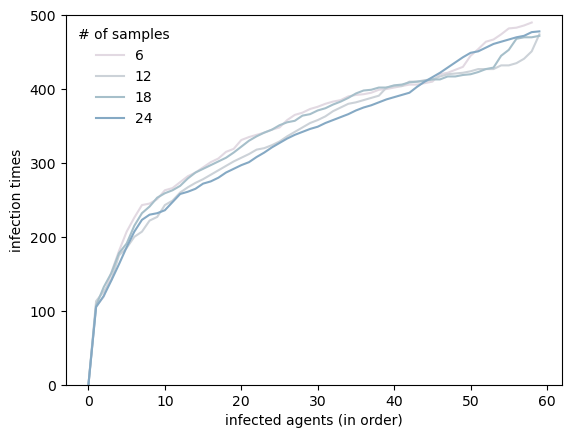

In [31]:
fig, ax = plt.subplots(1,1)
colors = plt.cm.twilight(np.linspace(0, 1, 21))  
for i in range(4):
    ax.plot(ar_list[i], label=f'{(i+1)*6}', color=colors[i])
    ax.set_ylim(-0.1,500)
plt.legend(title='# of samples',frameon=False)
plt.ylabel('infection times')
plt.xlabel('infected agents (in order)')
plt.show()
#fig.savefig('plots/mean_inf_time_n_200.svg', dpi=150)

### Build GL-SIS Models from worlds

In [3]:
model = gl.SIS_model(w)
model_cluster_no_inf_adapt = gl.SIS_model(w_cluster, determine_inf_times_for_cluster=False, clusters=True, cluster_params={'inf_times':[0,2,2,2,2,2,2,2,2,2,2], 'missing_entry': 2}) 
model_cluster = gl.SIS_model(w_cluster, determine_inf_times_for_cluster=True, clusters=True, inf_time_params={'n_cores': 5, 't': 500, 'n_samples':35})

INFO:root:159 missing values for infection times ar approximated by 2
INFO:root:creat homogeneous world with n_agents=170
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times with n_samples=35
INFO:root:run pre simulation sim_id=0
INFO:root:run pre simulation sim_id=2
INFO:root:run pre simulation sim_id=4
INFO:root:run pre simulation sim_id=6
INFO:root:run pre simulation sim_id=8
INFO:root:run pre simulation sim_id=1
INFO:root:run pre simulation sim_id=3
INFO:root:run pre simulation sim_id=7
INFO:root:run pre simulation sim_id=5
INFO:root:run pre simulation sim_id=9
INFO:root:run pre simulation sim_id=10
INFO:root:run pre simulation sim_id=12
INFO:root:run pre simulation sim_id=14
INFO:root:run pre simulation sim_id=16
INFO:root:run pre simulation sim_id=18
INFO:root:run pre simulation sim_id=11
INFO:root:run pre simulation sim_id=15
INFO:root:r

[[  0. 105. 105. ...  nan  nan  nan]
 [  0. 103. 107. ...  nan  nan  nan]
 [  0.  96. 103. ...  nan  nan  nan]
 ...
 [  0. 112. 116. ...  nan  nan  nan]
 [  0. 105. 131. ...  nan  nan  nan]
 [  0. 124. 140. ...  nan  nan  nan]]


In [5]:
model_cluster.mean_inf_time

[0,
 4,
 5,
 6,
 6,
 7,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20]

In [6]:
def plot_inf_day(m,ax, color='r',bins=np.arange(0,100,3), hist_kwargs={'color':'red', 'label':'cluster',}):
    m.world.ai_df['infection_day'] =  m.world.ai_df[~ m.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*m.world.dT/24))
    m.world.ai_df['infection_day'].hist(alpha=0.2, bins=bins, ax=ax, **hist_kwargs)

    ax.set_xlabel('days')
    ax.set_ylabel('infections')

def plot_inf_day_from_df(ai_df, ax ,dT=1, hist_kwargs={'color':'red', 'label':'cluster', 'alpha':0.2, 'bins': np.arange(0,100,3),}):
    ai_df['infection_day'] =  ai_df[~ ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT/24))
    ai_df['infection_day'].hist(**hist_kwargs)

    ax.set_xlabel('days')
    ax.set_ylabel('infections')

In [7]:
m_c = copy.deepcopy(model_cluster)

In [11]:
for m in [model, model_cluster, model_cluster_no_inf_adapt]:
    m.reset()
    for i in range(1,2): ## selected agent ID
        m.world.agents[i].state = 1 ## infect one agent
        m.world.agents[i].times['infection'] = 0 
    m.run(timespan=2000, only_inf_rel_contacts=True, only_infection=True )

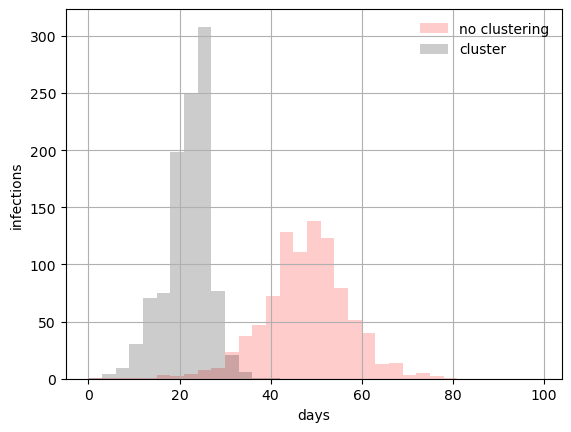

In [12]:
model.world.ai_df['infection_day'] =  model.world.ai_df[~ model.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model.world.dT/24))
model.world.ai_df['infection_day'].hist(alpha=0.2, bins=np.arange(0,100,3), color='red',label='no clustering')
model.world.ai_df['infection_day']

model_cluster.world.ai_df['infection_day'] =  model_cluster.world.ai_df[~ model_cluster.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model_cluster.world.dT/24))
model_cluster.world.ai_df['infection_day'].hist(alpha=0.2, bins=np.arange(0,100,3), color='black', label='cluster')
model_cluster.world.ai_df['infection_day']

plt.xlabel('days')
plt.ylabel('infections')
plt.legend(frameon=False)
plt.show()

1
170
170


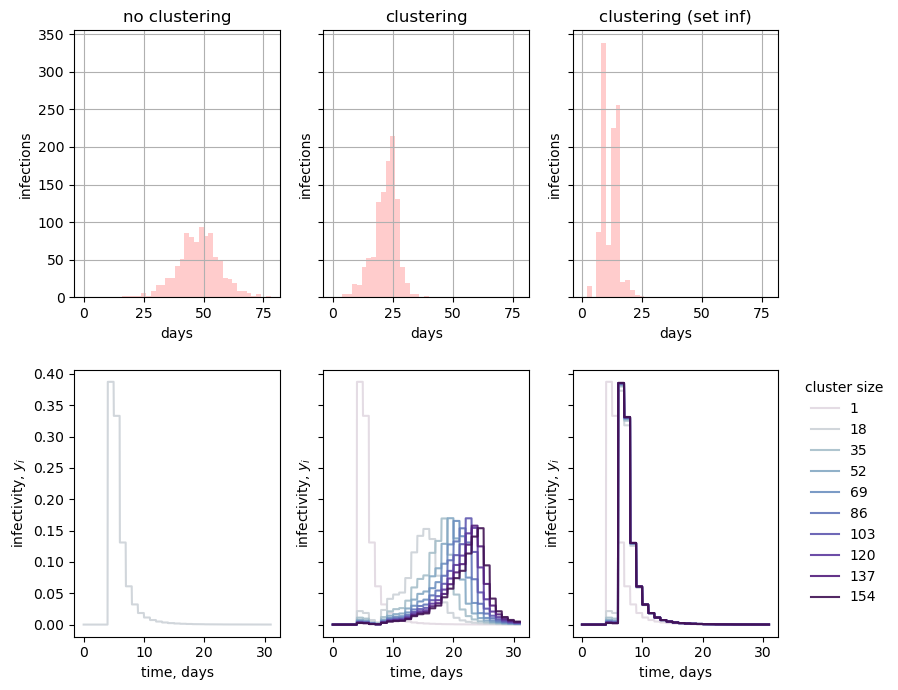

In [14]:
fig, axes = plt.subplots(2,3, figsize=(9,7), sharey='row')
n_c = 10 
colors = plt.cm.twilight(np.linspace(0, 1, 21))  
pds = []
for i,m in enumerate([model,model_cluster, model_cluster_no_inf_adapt]):
    ax0,ax1 = axes[0][i],axes[1][i]
    plot_inf_day(m, ax0, bins=np.arange(0,80,2), hist_kwargs={'color':'red'})
    p_d = m.world.infect_prob_dist_per_size
    #pds.append(p_d)
    max_c_size = max(m.world.infect_prob_dist_per_size.keys())
    print(max_c_size)
    if i ==0:
        ax1.plot(np.linspace(0,p_d[1].shape[0]/24,p_d[1].shape[0]),p_d[1], label=f'{1}', color=colors[1],alpha=0.9)
    else:    
        for k,c_size in enumerate(np.arange(1,max_c_size,max_c_size/n_c,int)):
            ax1.plot(np.linspace(0,p_d[c_size].shape[0]/24,p_d[c_size].shape[0]),p_d[c_size], label=f'{c_size}', color=colors[k],alpha=0.9)       
            #ax1.set_xlim(0,30)
    ax1.set_xlabel('time, days')
    ax1.set_ylabel(r'infectivity, $y_i$')

ax1.legend(loc=(1.1,0.1),title='cluster size', frameon=False,ncol=1)
axes[0,2].set_title('clustering (set inf)')
axes[0,1].set_title('clustering')
axes[0,0].set_title('no clustering')
plt.tight_layout()
plt.show()
fig.savefig('plots/clustered_comparison.png', bbox_inches='tight')

#### repeated simulations

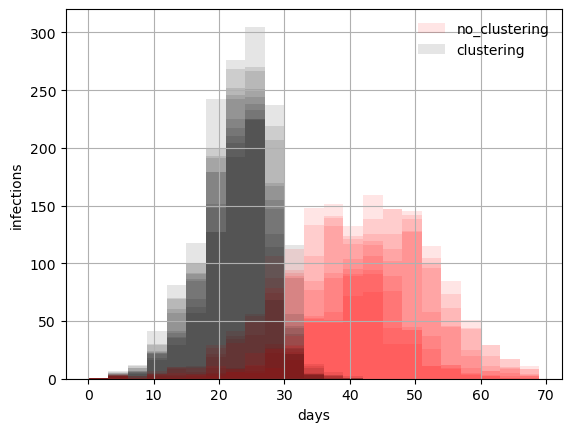

In [15]:
fig, ax = plt.subplots(1,1,)
for k in range(1,11):
    for m in [model, model_cluster, model_cluster_no_inf_adapt]:
        m.reset()
        for i in range(1,2): ## selected agent ID
            m.world.agents[i].state = 1 ## infect one agent
            m.world.agents[i].times['infection'] = 0 
        m.run(timespan=2000, only_inf_rel_contacts=True, only_infection=True )



    if k ==1:
        labels = ['no_clustering', 'clustering']
    else:
        labels = ['_nolegend_']*2    
    model.world.ai_df['infection_day'] =  model.world.ai_df[~ model.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model.world.dT/24))
    model.world.ai_df['infection_day'].hist(alpha=0.1, bins=np.arange(0,70,3), color='red',label=labels[0], ax=ax)
    model.world.ai_df['infection_day']

    model_cluster.world.ai_df['infection_day'] =  model_cluster.world.ai_df[~ model_cluster.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model_cluster.world.dT/24))
    model_cluster.world.ai_df['infection_day'].hist(alpha=0.1, bins=np.arange(0,70,3), color='black', label=labels[1], ax=ax)
    model_cluster.world.ai_df['infection_day']

ax.set_xlabel('days')
ax.set_ylabel('infections')
plt.legend(frameon=False)
fig.savefig('plots/w_wo_clustering.png')
plt.show()

In [85]:
def sim_models(n, models=[model, model_cluster, model_cluster_no_inf_adapt]):
    models_list = []
    for m in models:
            m.reset()
            for i in range(1,2): ## selected agent ID
                m.world.agents[i].state = 1 ## infect one agent
                m.world.agents[i].times['infection'] = 0 
            m.run(timespan=2000, only_inf_rel_contacts=True, only_infection=True )
            models_list.append(m.world.ai_df)
    return models_list        

results_list_mp = []
with Pool(4) as p:
     results_list_mp = p.map(sim_models,range(99))


1
170
170


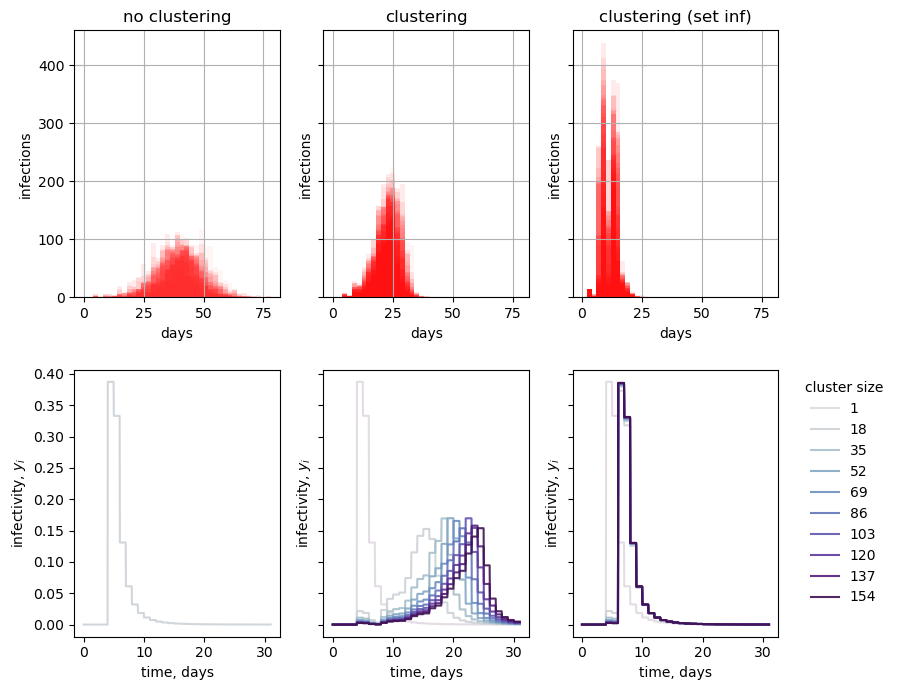

In [87]:
fig, axes = plt.subplots(2,3, figsize=(9,7), sharey='row')
n_c = 10 
step = 2
colors = plt.cm.twilight(np.linspace(0, 1, 21))  
pds = []
for i,m in enumerate([model,model_cluster, model_cluster_no_inf_adapt]):
    ax0,ax1 = axes[0][i],axes[1][i]
    for ai_df in [x[i] for x in results_list_mp]:
        plot_inf_day_from_df(ai_df, ax=ax0, hist_kwargs={'color':'red', 'label':'cluster', 'alpha':0.02, 'bins': np.arange(0,80,step),'ax':ax0})
    p_d = m.world.infect_prob_dist_per_size
    #pds.append(p_d)
    max_c_size = max(m.world.infect_prob_dist_per_size.keys())
    print(max_c_size)
    if i ==0:
        ax1.plot(np.linspace(0,p_d[1].shape[0]/24,p_d[1].shape[0]),p_d[1], label=f'{1}', color=colors[1],alpha=0.9)
    else:    
        for k,c_size in enumerate(np.arange(1,max_c_size,max_c_size/n_c,int)):
            ax1.plot(np.linspace(0,p_d[c_size].shape[0]/24,p_d[c_size].shape[0]),p_d[c_size], label=f'{c_size}', color=colors[k],alpha=0.9)       
            #ax1.set_xlim(0,30)
    ax1.set_xlabel('time, days')
    ax1.set_ylabel(r'infectivity, $y_i$')

ax1.legend(loc=(1.1,0.1),title='cluster size', frameon=False,ncol=1)
axes[0,2].set_title('clustering (set inf)')
axes[0,1].set_title('clustering')
axes[0,0].set_title('no clustering')
plt.tight_layout()
plt.show()
fig.savefig('plots/clustered_comparison.png', bbox_inches='tight')

1
170
170


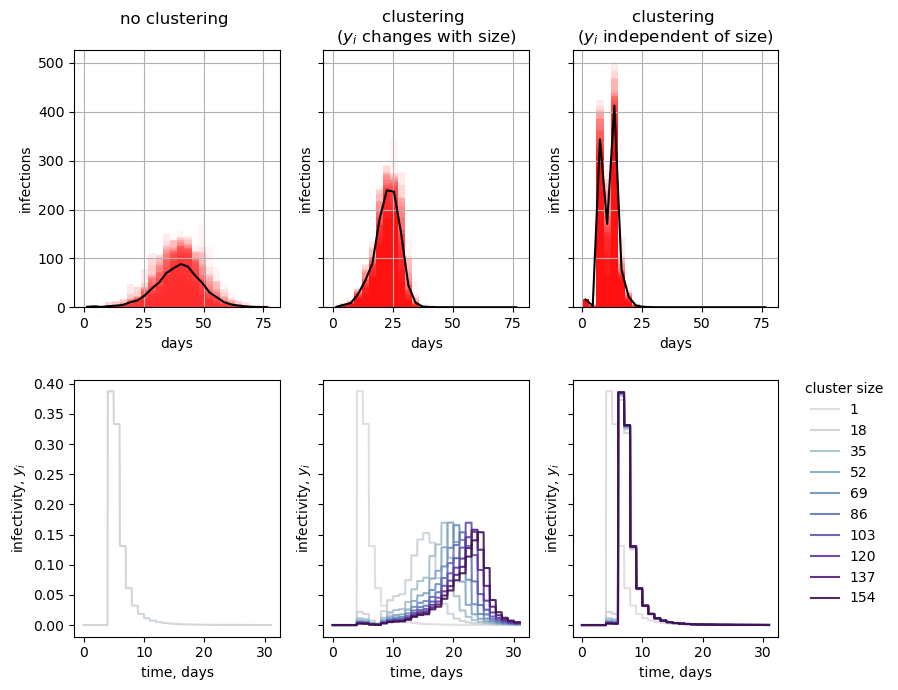

In [98]:
fig, axes = plt.subplots(2,3, figsize=(9,7), sharey='row')
n_c = 10 
step = 2
colors = plt.cm.twilight(np.linspace(0, 1, 21))  
pds = []
step=3
bins =  np.arange(0,80,step)

for i,m in enumerate([model,model_cluster, model_cluster_no_inf_adapt]):
    ax0,ax1 = axes[0][i],axes[1][i]
    comb_res_list = []
    for ai_df in [x[i] for x in results_list_mp]:
        comb_res_list.append(np.histogram(ai_df['infection_day'][~pd.isna(ai_df['infection_day'])].values, bins=bins)[0])
        plot_inf_day_from_df(ai_df, ax=ax0, hist_kwargs={'color':'red', 'label':'cluster', 'alpha':0.02, 'bins': np.arange(0,80,step),'ax':ax0})
    df = pd.DataFrame(data=comb_res_list)
    ax0.plot((bins-step/2)[1:],df.mean(),color='k')    
    p_d = m.world.infect_prob_dist_per_size
    #pds.append(p_d)
    max_c_size = max(m.world.infect_prob_dist_per_size.keys())
    print(max_c_size)
    if i ==0:
        ax1.plot(np.linspace(0,p_d[1].shape[0]/24,p_d[1].shape[0]),p_d[1], label=f'{1}', color=colors[1],alpha=0.9)
    else:    
        for k,c_size in enumerate(np.arange(1,max_c_size,max_c_size/n_c,int)):
            ax1.plot(np.linspace(0,p_d[c_size].shape[0]/24,p_d[c_size].shape[0]),p_d[c_size], label=f'{c_size}', color=colors[k],alpha=0.9)       
            #ax1.set_xlim(0,30)
    ax1.set_xlabel('time, days')
    ax1.set_ylabel(r'infectivity, $y_i$')

ax1.legend(loc=(1.1,0.1),title='cluster size', frameon=False,ncol=1)
axes[0,2].set_title('clustering \n'r'($y_i$ independent of size)')
axes[0,1].set_title('clustering \n'r'($y_i$ changes with size)')
axes[0,0].set_title('no clustering \n ')
plt.tight_layout()
plt.show()
fig.savefig('plots/clustered_comparison_w_mean.png', bbox_inches='tight')